In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math

# Distribuciones de Probabilidad

## Poisson

$P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}$

Se interpreta como la probabilidad de ocurrencias de $k$ eventos en  un intervalo de tiempo, el cual pasa en promedio $\lambda$ veces en este mismo intervalo

In [58]:
def poisson(k, lam):
    return (lam**k * math.e**(-lam)) / (math.factorial(k))

Ejemplo: Se sabe que en cierto canal hay 2 transacciones fraudulentas por dia, por lo que se hará un operativo de monitoreo a todas las transacciones durante un dia, pero primero se quiere saber cual es la probabilidad de que haya almenos una transaccion fraudulenta.

Respuesta: La probabilidad es de 86.4%

In [63]:
1 - poisson(0, 2)

0.1804470443154836

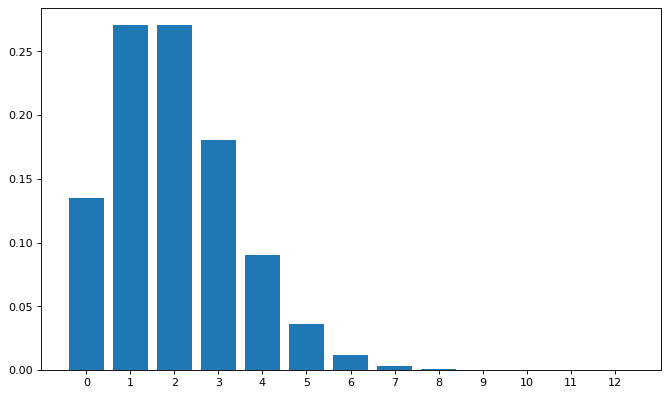

In [61]:
figure(figsize=(10, 6), dpi=80)
x = list(range(0, 13))

plt.bar(list(map(str, x)), [poisson(xi, 2) for xi in x])
plt.show()

## Exponencial

$f(x) = \lambda e^{-\lambda x}, x \in [0, \infty)$

Se interpreta como el tiempo esperado hasta que un evento ocurra, siendo $\lambda$ el promedio de ocurrencias en una unidad de tiempo de este intervalo

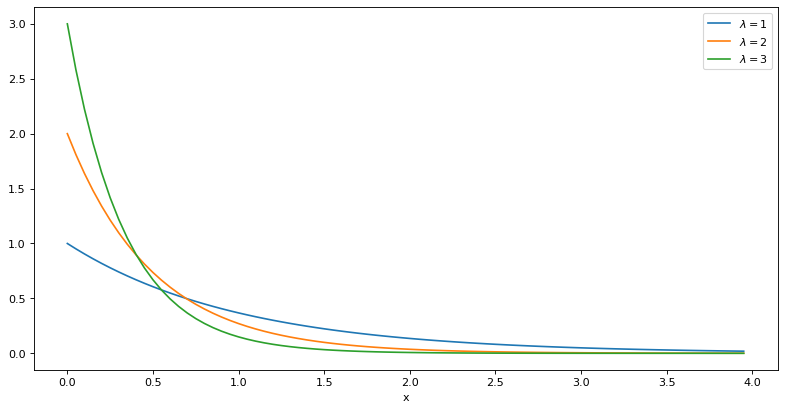

In [21]:
t = np.arange(0, 4, 0.05)
figure(figsize=(12, 6), dpi=80)

def exp(lam, x):
    return lam * math.e ** (-lam * x)

plt.plot(t, exp(1, t), label = "$\lambda = 1$")
plt.plot(t, exp(2, t), label = "$\lambda = 2$")
plt.plot(t, exp(3, t), label = "$\lambda = 3$")
plt.legend(loc='upper right')
plt.xlabel('x')
plt.show()

Por ejemplo: Si se sabe que dos redes descentralizadas se congestionan frecuentemente, la primera en promedio 3 veces al dia y la segunda 1 vez cada 2 dias

Para la primera red el tiempo entre congestiones $\lambda$ será 3 y para la segunda $\lambda$ 1/2

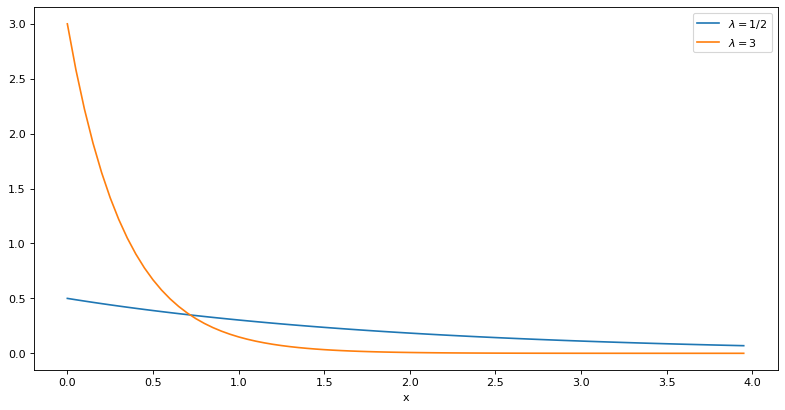

In [68]:
t = np.arange(0, 4, 0.05)
figure(figsize=(12, 6), dpi=80)

def exp(x, lam):
    return lam * math.e ** (-lam * x)

plt.plot(t, exp(t, 1/2), label = "$\lambda = 1/2$")
plt.plot(t, exp(t, 3), label = "$\lambda = 3$")
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Como se puede ver en la grafica, cuando $\lambda = 3$ la funcion está bastante acumulada a la izquierda, porque la probabilidad de ocurrencia cuando se empieza a observar es mucho mas alta 

## Gamma

$f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1} e^{-\beta x}$

Cuando $\alpha$ es un numero entero positivo, se interpreta como el tiempo esperado hasta que $\alpha = n$ eventos ocurran, donde cada evento se distribuye exponencialmente con parametro $\lambda$, el parametro $\beta = \lambda$ 

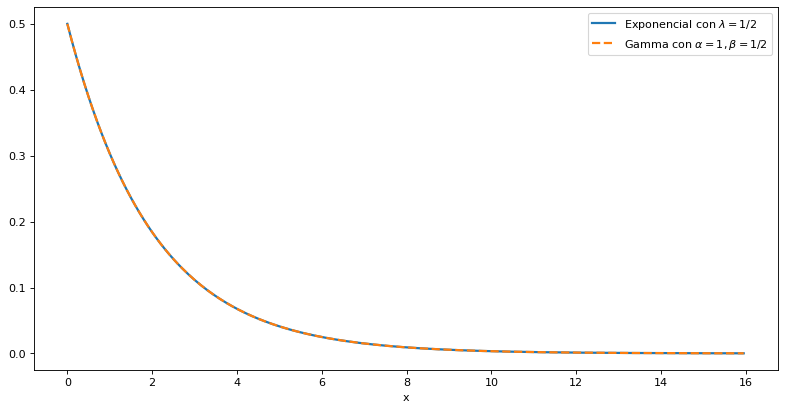

In [69]:

def gamma(x, alpha, beta):
    return (beta**alpha * x ** (alpha - 1) * math.e ** (-beta * x)) / (math.gamma(alpha))


t = np.arange(0, 16, 0.05)
figure(figsize=(12, 6), dpi=80)

plt.plot(t, exp(t, 1/2),'-', label = "Exponencial con $\lambda = 1/2$", linewidth=2)
plt.plot(t, gamma(t, 1, 1/2),'--',label = "Gamma con $\\alpha = 1, \\beta = 1/2$", linewidth=2)
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Ejemplo: Un observador sabe que el tiempo que le toma avistar una especie rara en un rio se distribuye exponencialmente con una ocurrencia $\lambda$ de 4 avistamientos cada dia, el observador quiere saber cuanto tiempo le tomaria avistar $n$ especies raras, este tiempo se modela con una distribución $Gamma(n, 4)$.
Digamos que el observador quiere saber cuanto le tomaria avistar 5 y 10 individuos diferentes 

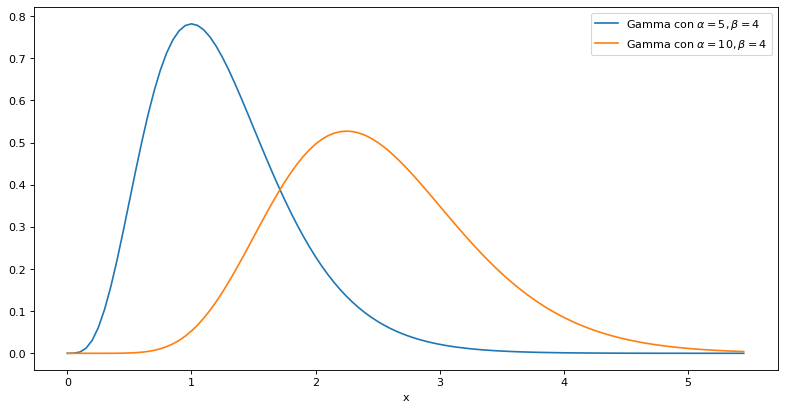

In [9]:
t = np.arange(0, 5.5, 0.05)
figure(figsize=(12, 6), dpi=80)

plt.plot(t, gamma(t, 5, 4),label = "Gamma con $\\alpha = 5, \\beta = 4$")

plt.plot(t, gamma(t, 10, 4),label = "Gamma con $\\alpha = 10, \\beta = 4$")
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Podemos ver que la probabilidad de avistar 5 individuos en un dia es bastante alta.

Y avistar 10 individuos en dos dias no parece algo tan raro.